# Heart Disease Classification

Cardiovascular illnesses (CVDs) are the major cause of death worldwide. CVDs include coronary heart disease, cerebrovascular disease, rheumatic heart disease, and other heart and blood vessel problems. According to the World Health Organization, 17.9 million people die each year. Heart attacks and strokes account for more than four out of every five CVD deaths, with one-third of these deaths occurring before the age of 70. A comprehensive database for factors that contribute to a heart attack has been constructed.

The main purpose here is to collect characteristics of Heart Attack or factors that contribute to it.
The size of the dataset is 1319 samples, which have nine fields, where eight fields are for input fields and one field for an output field. 
 - age, 
 - gender, 
 - eart rate (impulse), 
 - systolic BP (pressurehight), 
 - diastolic BP (pressurelow), 
 - blood sugar(glucose), 
 - CK-MB (kcm), 
 - and Test-Troponin (troponin) 
are representing the input fields, while the output field pertains to the presence of 
 - heart attack (class), 
which is divided into two categories (negative and positive); negative refers to the absence of a heart attack, while positive refers to the presence of a heart attack.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-classification-dataset/Heart Attack.csv


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Bring in the datasets

In [3]:
heart_source = pd.read_csv('/kaggle/input/heart-disease-classification-dataset/Heart Attack.csv')
heart_source.head()


,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [4]:
# gender count
gender_count = heart_source.gender.value_counts()
gender_count

1    870
0    449
Name: gender, dtype: int64

In [5]:
# Plot age distribution
fig = px.histogram(heart_source.age, marginal="rug")
fig.show()

/tmp/ipykernel_21/1439161542.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



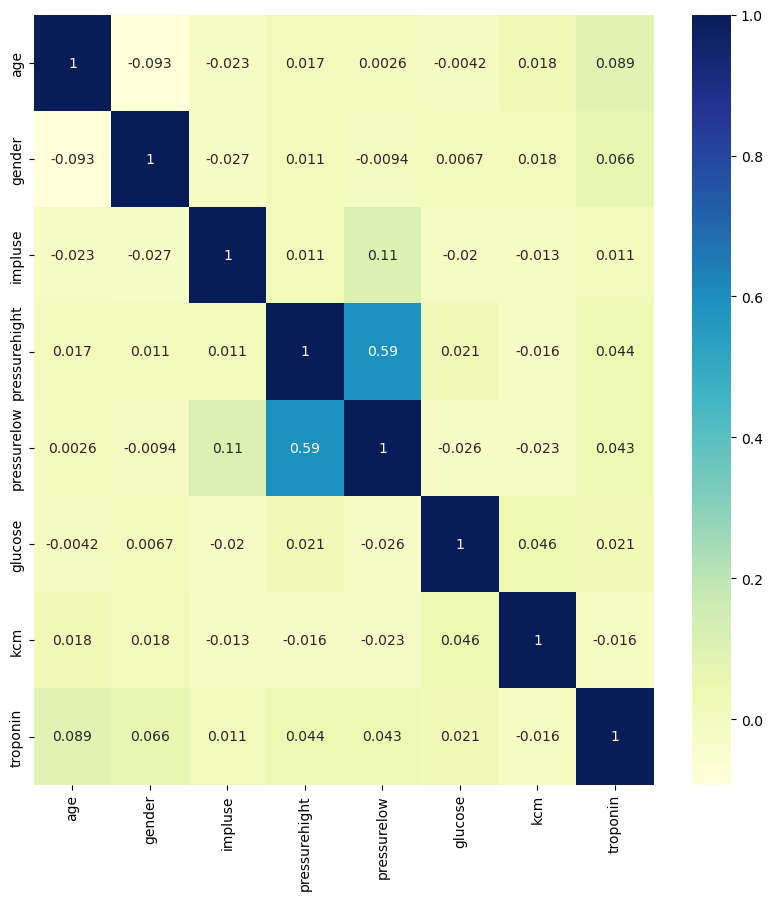

In [6]:
# Create the correlation matrix
corr = heart_source.corr()

# Create the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()

## May need to clean the dataset for ML safe reason 

In [7]:
heart_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


## Use fastai tabular learner

In [8]:
from fastai.tabular.all import *

In [9]:
path = Path('/kaggle/input/heart-disease-classification-dataset')
cat_names = ['gender']
cont_names = ['age', 'impluse', 'pressurehight', 
              'pressurelow', 'glucose', 'kcm', 'troponin']

In [10]:
dls = TabularDataLoaders.from_csv(
    path/'Heart Attack.csv', path=path, 
    y_names = "class",
    cat_names = cat_names,
    cont_names = cont_names,
    splits = RandomSplitter(valid_pct=0.2)(range_of(heart_source)),
    shuffle = True,
    bs = 64,
    procs = [Categorify, FillMissing, Normalize]
)

In [11]:
dls.show_batch()

,gender,age,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,1,57.000000,82.000000,138.000000,93.000001,297.000000,6.750000,0.020,positive
1,0,51.000000,70.000000,140.000000,89.999999,150.000000,1.810000,0.013,negative
2,1,45.000000,95.999999,97.000000,55.000000,144.000000,2.870000,1.480,positive
3,1,57.000000,88.000000,110.000001,70.000000,83.000000,40.990002,7.670,positive
4,1,58.000000,75.000000,116.000000,73.000000,108.000000,27.309999,0.049,positive
5,0,31.000000,64.000000,130.000000,70.000000,263.000003,142.600003,0.003,positive
6,0,46.000000,76.000000,169.000001,95.000001,152.000000,2.190000,0.006,negative
7,1,70.000001,112.000001,169.999999,104.000001,111.000000,1.200000,1.380,positive
8,0,80.000000,59.000000,137.000000,81.000000,93.000000,2.410000,0.013,negative
9,0,52.000000,71.000000,143.000000,71.000000,108.999999,5.650000,0.930,positive


In [12]:
learn = tabular_learner(dls, metrics = accuracy)

In [13]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.682513,0.647512,0.562738,00:00
1,0.621456,0.545834,0.733840,00:00
2,0.573642,0.495731,0.752852,00:00
3,0.535700,0.460331,0.741445,00:00
4,0.510033,0.456614,0.764259,00:00


## sklearn decision tree

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [15]:
heart_source.iloc[:,:-1].head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
0,64,1,66,160,83,160.0,1.80,0.012
1,21,1,94,98,46,296.0,6.75,1.060
2,55,1,64,160,77,270.0,1.99,0.003
3,64,1,70,120,55,270.0,13.87,0.122
4,55,1,64,112,65,300.0,1.08,0.003


In [16]:
# Shuffle the dataset
X, y = shuffle(heart_source.iloc[:,:-1], heart_source.iloc[:,-1], random_state=0)

In [17]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.9878787878787879
